In [2]:
from util_plot import *
from util_feature import *  
from util_model import * 

In [3]:
file_path = 'data/airbnb/'

In [11]:
# Unzip all the docs as csv obviously

neighbourhoods = file_path+'neighbourhoods.csv'
listings = file_path+'listings.csv'
listings_summary = file_path+'listings_summary.csv'
reviews = file_path+'reviews.csv'
reviews_summary = file_path+'reviews_summary.csv'

In [38]:
df_neighb = pd.read_csv(neighbourhoods)
df_list = pd.read_csv(listings)
df_list_sum = pd.read_csv(listings_summary)
df_rev = pd.read_csv(reviews)
df_rev_sum = pd.read_csv(reviews_summary)

In [39]:
def shape_dataframe(df):
    name =[x for x in globals() if globals()[x] is df][0]
    print(f'shape of {name} is: {df.shape}')

In [40]:
shape_dataframe(df_neighb)
shape_dataframe(df_list)
shape_dataframe(df_list_sum)
shape_dataframe(df_rev)
shape_dataframe(df_rev_sum)

shape of df_neighb is: (139, 2)
shape of df_list is: (22552, 16)
shape of df_list_sum is: (453, 96)
shape of df_rev is: (401963, 2)
shape of df_rev_sum is: (15695, 6)


In [41]:
df_neighb.head()

,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße
3,Charlottenburg-Wilm.,Forst Grunewald
4,Charlottenburg-Wilm.,Grunewald


In [42]:
df_list.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220


In [43]:
df_list.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [44]:
df_list_sum.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


In [45]:
df_list_sum.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [46]:
df_rev.head(3)

,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26


In [47]:
df_rev_sum.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...


Only looking at listings, to get an idea of the functions

In [55]:
df_unique_values = pd_stat_col(df_list)
df_unique_values

,col,nunique,ratio,coltype
0,id,22552,1.000000,num
1,name,21873,0.969892,num
2,host_id,19180,0.850479,num
3,host_name,5997,0.265919,num
4,neighbourhood_group,12,0.000532,cat
5,neighbourhood,136,0.006031,num
6,latitude,22552,1.000000,num
7,longitude,22552,1.000000,num
8,room_type,3,0.000133,cat
9,price,295,0.013081,num


In [58]:
# Isn't working, will make a function that works later

#plot_pair(df_list, ['price'], ['neighbourhood_group'])

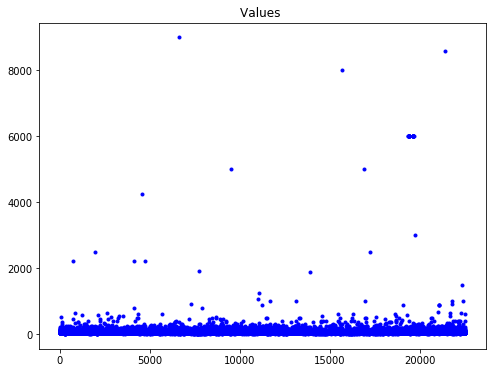

In [60]:
plot_Y(df_list['price'])

('NaN count:', 0, 'Unique count:', 295)
('Max:', 9000, 'Min:', 0)
('Median', 45.0, 'Mean:', 67.14366796736431, 'Std:', 220.2613265910614)


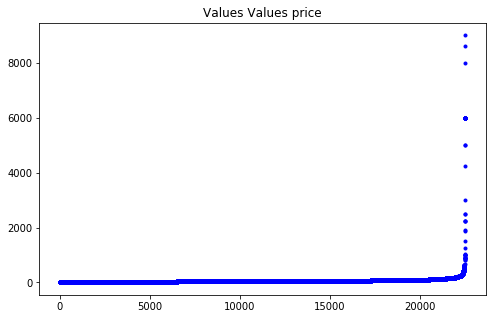

/home/maxime/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


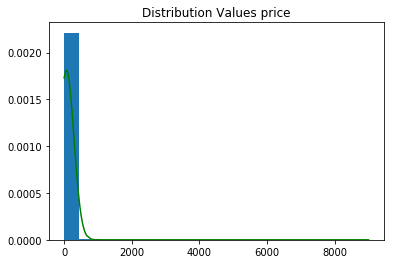

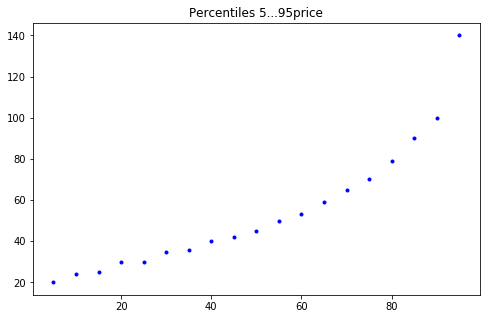

In [61]:
plot_col_distribution(df_list, ['price'])